In [1]:
#we use the following libraries

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Measures of Position**

A measure of position determined the position of a single value in relation to other values or a population data set. Unlike the mean and the standard deviation, descriptive measures based on **quantiles** are not sensitive to the influence of a few extreme observations. For this reason, descriptive measures based on quantiles are often preferred over those based on the mean and standard deviation.

Quantiles are cut points dividing the range of the data into contiguous intervals with equal probabilities. Certain quantiles are particularly important: The **median** of a data set divides the data into equal parts: the bottom 50% and the top 50%. **Quartiles** divide the data into four equal parts and *percentiles* divide it into $100$ equal parts. Note that the median is also the 50th percentile. **Deciles** divide a data set into $10$ equal parts, and the **quintiles** divide a data set into $5$ equal parts. There is always one less quantile than the number of groups created (e.g. There are **3** quartiles dividing the data into **4** equal parts!).

**Quartiles and Interquartile Range**

**Quartiles** divide a ranked data set into **four equal parts**. These three measures are denoted **first quartile (denoted Q1)**, **second quartile (denoted by Q2)**, and **third quartile (denoted by Q3)**. The second quartile is the same as the median of a data set. The first quartile is the value of the middle term among the observations that are less than the median, and the third quartile is the value of the middle term among the observations that are greater than the median.

![quartile](quartile.png)

Approximately 25% of the values in ranked data set are less than Q1 and about 75% are greater than Q1. The second quartile, Q2, divides a ranked data set into two equal parts; hence the second quartile and the median are the same. Approximately 75% of the data values are less than Q3 and about 25% are greater than Q3. The difference between the third quartile and the first quartile for a data set is called the **interquartile range (IQR)**.


<center> IQR = Q3-Q1 </center>   


**Calculating Quantiles**

Given a set of values $x_1, x_2, \dots x_n$ we can define the
quantiles for any fraction $p$ as follows.

Sort the values in order
$$x_{(1)} \leq x_{(2)} \leq \cdots \leq x_{(n)}.$$

The values $x(1), . . . , x(n)$ are called the **order statistics** of the original sample. Take the order statistics to be the quantiles which correspond to the fractions:

$$p_i = \frac{i-1}{n-1} \ (i = 1,\dots,n)$$

In general, to define the quantile which corresponds to the fraction $p$ to be the linear interpolation between the two nearest $p_i$.

If $p$ lies a fraction of $f$ from $p_i$ to $p_{i+1}$ define the $p$th quantile to be:

$$Q(p) = (1 − f)Q(p_i) + fQ(p_i+1)$$

As special cases, we have:

- Median: $Q(0.5)$
- Lower Quartile: $Q(0.25)$
- Upper Quartile: $Q(0.75)$

The function $Q$ defined in this way is called the Quantile Function.

In [2]:
#FU Berlin student data set. 

students_df = pd.read_csv("students.csv")

students_df.head(10)

,stud.id,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
1,833917,"Gonzales, Christina",Female,19,160,64.8,Muslim,1.91,1st,Political Science,Social Sciences,NaN,NaN,0,0,NaN
2,898539,"Lozano, T'Hani",Female,19,172,73.0,Other,1.56,2nd,Social Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
3,379678,"Williams, Hanh",Female,22,168,70.6,Protestant,1.24,3rd,Social Sciences,Mathematics and Statistics,45.0,46.0,0,0,NaN
4,807564,"Nem, Denzel",Male,19,183,79.7,Other,1.37,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
5,383291,"Powell, Heather",Female,21,175,71.4,Catholic,1.46,1st,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
6,256074,"Perez, Jadrian",Male,19,189,85.8,Catholic,1.34,2nd,Political Science,Mathematics and Statistics,NaN,NaN,0,0,NaN
7,754591,"Clardy, Anita",Female,21,156,65.9,Protestant,1.11,2nd,Political Science,Social Sciences,NaN,NaN,0,0,NaN
8,146494,"Allen, Rebecca Marie",Female,21,167,65.7,Other,2.03,3rd,Political Science,Economics and Finance,58.0,62.0,0,0,NaN
9,723584,"Tracy, Robert",Male,18,195,94.4,Other,1.29,3rd,Economics and Finance,Environmental Sciences,57.0,67.0,0,0,NaN
10,314281,"Nimmons, Laura",Female,18,165,66.0,Orthodox,1.19,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN


In [3]:
print(students_df['nc.score'].quantile(0.25),
students_df['nc.score'].quantile(0.5),
students_df['nc.score'].quantile(0.75),
students_df['nc.score'].quantile(1))

1.46 2.04 2.78 4.0


In [4]:
# summary statistics

students_df['nc.score'].describe()

count    8239.000000
mean        2.166481
std         0.811548
min         1.000000
25%         1.460000
50%         2.040000
75%         2.780000
max         4.000000
Name: nc.score, dtype: float64

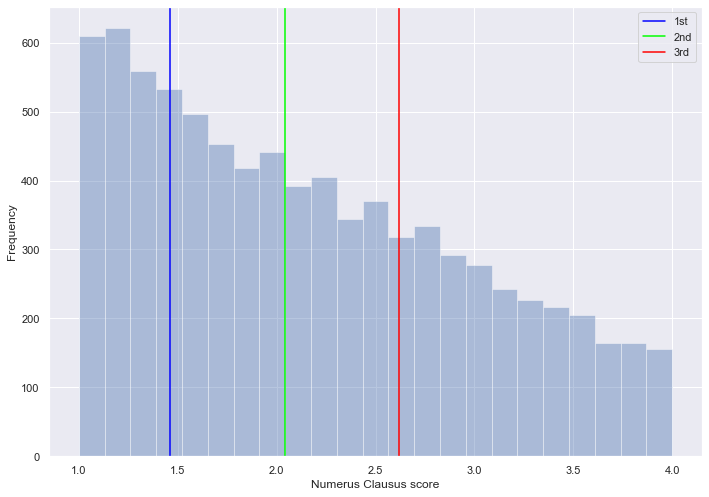

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.distplot(a=students_df['nc.score'], kde= False)
plt.axvline(students_df['nc.score'].quantile(0.25),color='blue', label = '1st')
plt.axvline(students_df['nc.score'].quantile(0.5),color='lime',label = '2nd')
plt.axvline(students_df['nc.score'].quantile(0.7),color='red', label = '3rd')
plt.legend()
plt.xlabel('Numerus Clausus score')
plt.ylabel('Frequency')

pass


**The Five Number Summary**

From the three quartiles (Q1,Q2,Q3), we can obtain a measure of center (the median, Q2) and measures of variation of the two middle quarters of the data, Q2-Q1 for the second quarter and $Q3-Q2$ for the third quarter. But the three quartiles do no tell us anything about the variation of the first and fourth quarters.

To gain that information, we include the minimum and maximum observations as well. The variation of the first quarter can be measured as the difference between the minimum and the first quartile, Q1 - Min, and the variation of the fourth quarter can be measured as the the difference between the third quartile and the maximum, Max - Q3. Thus the minimum, maximum, and quartiles together provide, among other things, information on center and variation.

The so called **Tukey Five-Number Summary** of a data set consists of the Min, Q1, Q2, Q3, and Max of the data set.

**Percentiles and Percentile Rank**

**Percentiles** divide a ranked data set into $100$ equal parts. Each (ranked) data set has $99$ percentiles that divide it into $100$ parts. The $k^{th}$ percentile is denoted $P_k$, where $k$ is a interger in the range $1$ to $99$. For instance, the $25^{th}$ percentile is denoted by $P_{25}$.

Thus, the $k^{th}$ percentile $P_k$ can be defined as a value in a data set such that about $k\%$ of the measurements are smaller than the value of $P_k$ and about $(100-k)$ of the measurements are greater than the value of $P_k$.

The approximate value of the $k^{th}$ percentile, denoted by $P_k$, is 

$$ P_k = \frac{kn}{100}$$

where $k$ denotes the number of the percentile and $n$ represents the sample size.

In [6]:
# percentiles in python

#percentile 

perc = [38,50,73]

n = len(students_df['nc.score'])

for k in perc:
    print('the {0}th percentile\'s position is number {1}'.format(k, math.ceil(k*n/100)))
          
# select value based on number in the ordered vector
for k in perc:
    print(sorted(students_df['nc.score'])[math.ceil(k*n/100)])
 
# we get the same result as above
for k in perc:
    print(students_df['nc.score'].quantile(k/100))



the 38th percentile's position is number 3131
the 50th percentile's position is number 4120
the 73th percentile's position is number 6015
1.74
2.04
2.71
1.74
2.04
2.71


That worked out fine! One may check if the median of <mark> nc.score </mark> variable corresponds to the $50^{th}$ percentile ($2.04$) as calculated above.

We can also calculate the **percentile rank** for a particular value $x_i$ of a data set by the following equation:

$$ \text{Percentile rank of $x_i$} = \frac{\text{Number of values less than $x_i$}}{ \text{Total number of values in the data set}}$$

The percentile rank of $x_i$ gives the percentage of values in the data set that are less than $x_i$. 

In [7]:
# percentile python

np.percentile(students_df['nc.score'], 38)

1.74

**Outliers and Boxplots**

**Outliers**

In data analysis, the identification of outliers and thus, observations that fall well outside the overall pattern of the data is very important. An outlier requires special attention. It may be the result of a measurement or recording error, an observation from a different population, or an unusual extreme observation. Note that an extreme observation need not be an outlier; it may instead be an indication of skewness.

It we observe an outlier, we should try to determine its cause. If an outlier is caused by a measurement or recording error, or if for some other reason it clearly does not belong to the data set, the outlier can simply be removed. However, if no explanation for an outlier is apparent, the decision whether to retain it in the data set is a difficult judgement call.

As a diagnostic tool for spotting observations that may be outliers we may use quartiles and the IQR. Therefore, we define the **lower limit** and the **upper limit** of a data set. The lower limit is the number that lies $1.5 \times IQRs$ below the first quartile; the upper limit is the number that lies $1.5 \times IQRs$ above the third quartile. Observations that lie below the lower limit or above the upper limit are potential outliers

$$ \text{Lower limit} = Q1 - 1.5 \times IQR$$

$$ \text{Upper limit} = Q3 + 1.5 \times IQR $$

**Boxplots**

A boxplot, also called a **box-and-whisker diagram** is based on the five-number summary and can be used to provide a graphical display of the center and variation of a data set. Several types of boxplots are in common use.

Box-and-whisker plots give a graphic presentation of data using five measures: the median, the first quartile, the third quartile, and the smallest and the largest values in the data set between the lower and the upper limits. The spacing between the different parts of the box indicates the degree of dispersion (spread) and skewness in the data. We can compare different distributions by making box-and-whisker plots for each of them. It also helps to detect outliers. Box plots can be drawn either horizontally or vertically.

![box-whisker](box-whisker-plot.png)

The edges of the box are always the first and third quartiles, and the band inside the box is always the second quartile (the median). The lines extending from the boxes(whiskers) indicating variability outside the upper and lower quartiles. To construct a boxplot, we also need the concept of adjacent values. The **adjacent values** of a data set are the most extreme observations that are not potential outliers. Outliers may be plotted as individual points. Note that, if a data set has no potential outliers, the adjacent values are the minimum and maximum observations.‚

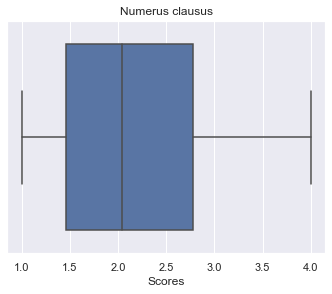

In [8]:
#boxplots in python

sns.set(rc={'figure.figsize':(5.7,4.27)})


sns.boxplot(x=students_df['nc.score'], orient = 'h') # orient = 'v'
plt.xlabel('Scores')
plt.title('Numerus clausus')

pass

Boxplots are a very powerful technique for exploratory data analysis, as it is very easy to condition the variables of interest, in our case <mark> nc.score </mark> variable, on other variables.

Let us plot a boxplot of the <mark> nc.score </mark>  variable conditioned of the <mark> semester </mark> variable. The <mark> semester </mark>  variable corresponds to the semester the particular student is studying. For your information: the minimum period of study for the study programs under investigation is set to $4$ semesters.

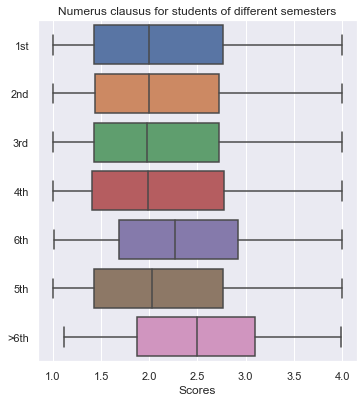

In [9]:
# multiple boxplots in python

sns.set(rc={'figure.figsize':(5.7,6.27)})


sns.boxplot(x=students_df['nc.score'], y=students_df['semester'], orient = 'h') # orient = 'v'
plt.xlabel('Scores')
plt.ylabel('')
plt.title('Numerus clausus for students of different semesters')

pass

The plot suggests that students of higher semesters tend to score lower on the *numerus clausus*. Or in other words, those students who finish their studies within the minimum period of study, tend to have a higher *numerus clausus* score.

However, we are not yet finished. We want to know if gender has any effect on that observation. For this we use a notch plot.

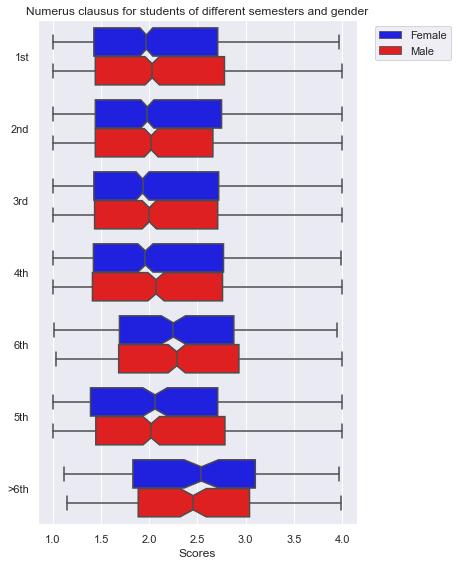

In [10]:
# notch plot in python

sns.set(rc={'figure.figsize':(5.7,9.27)})


sns.boxplot(x=students_df['nc.score'], y=students_df['semester'], hue = students_df['gender'], palette=['blue','red'], orient = 'h', notch='true') # orient = 'v'
plt.xlabel('Scores')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Numerus clausus for students of different semesters and gender')

pass

The plot is not as easy to interpret. Though, it seems that the above made observation is confirmed: students of higher semester tend to score lower on the *numerus clausus*. However the impact of gender on the *numerus clausus* scores is not clear. We will have to apply methods of inferential **statistics** to assess, whether these differences are *statistically significant*, or whether these fluctuations around the median may be also caused solely by chance.

To wrap this section up, and in order to see a boxplot with outliers too, we plot the <mark> height </mark> variable against the <mark> gender </mark> variable. 

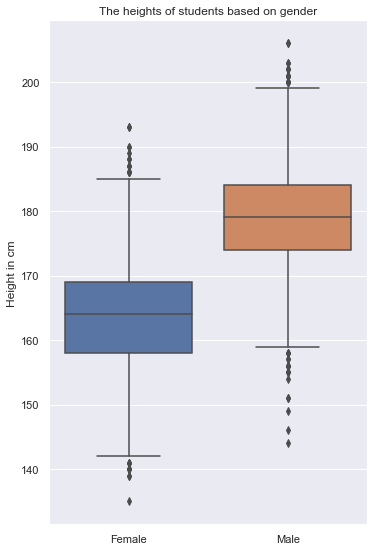

In [11]:
#boxplots with outliers

# notch plot in python

sns.set(rc={'figure.figsize':(5.7,9.27)})


sns.boxplot(x=students_df['gender'], y=students_df['height']) # orient = 'v'
plt.xlabel('')
plt.ylabel('Height in cm')
plt.title('The heights of students based on gender')

pass

Obviously, and certainly not that unexpected, there is a difference in the height of the students among the different groups(male or female). Female students tend to be smaller than male student, however if we look at the extremes, there are large and small individuals in both groups. However, as mentioned above we will first have to test the data for *statistical significance* to be more confident, that this observed difference in height is not just observed by chance.

# Technical discussion regarding quantiles

## Quantiles for Random Variables

**Definition.** Let $X$ be random variable taking values in $\mathbb{R}$. For $q \in (0,1)$, a number $y \in \mathbb{R}$ is called a $q$-quantile or a quantile of order $q$ for $X$ if the following conditions are met:

$$\mathbb{P}[X < y] \leq q  \text{   and }  \mathbb{P}[X > y] \leq 1-q$$

or equivalently

$$\mathbb{P}[X < y] \leq q  \text{   and }  \mathbb{P}[X \leq y] \geq q.$$

**Examples.**

- Let $X$ take the value 0 with probability $1$. Then $0$ is a quantile of order $q$ for all $q \in (0,1).$

- Let $X$ be the standard normal. Then $0$ is the unique $0.5$-quantile.

**Remarks.**

- $q$-quantiles always exist but they may not be unique.

- If $X$ is supported on an interval and has a continuous strictly  increasing cumulative distribution function then the quantiles are unique.

- One could relax the defintion to include $q=0,1$ but these quantiles might not always exist. For example, in the case of the standard normal there is no $y \in \mathbb{R}$ such that $\mathbb{P}[X < y] = 0$. But one could still think in terms of infimum and supremum (minimum and maximum when bounded), so in the case of the standard normal, the 0-quantile would be $- \infty$ and the $1$-quantile would be $\infty$.

# Quantiles for Datasets

Given a dataset $D = (x_1, \dots, x_n)$ of real numbers, with $n \geq 1$, how do we define quantiles for $D$?

We will present two different definitions, but both of them satisfy the following properties

1. The minimum is a $0$-quantile.

2. The maximum is a $1$-quantile.

3. The median value is  a $0.5$-quantile

4. For $D = (x_1 < \cdots < x_n), n \geq 2$, the number $x_i$ should be a $\frac{i-1}{n-1}$-quantile.

## Empirical Quantiles

The simplest probabiltiy distribtuion we could assign to $D$ is the empirical distirbution. So $X$ takes the value $x_i$ with probability $k/n$ where $k$ is the number of times $x_i$ appears in $D$.

**Definition.** An empirical $q$-quantile for $D$ is a $q$-quantile for $X$ with the above stated distribution. This means that the following conditions should be met:

$$\frac{ \# \{ x \in D | x < y \}}{ \# D} \leq q \text{ and } \frac{\# \{x \in D | x > y \}}{ \# D} \leq 1-q.$$

**Remark.**

- Empirical quantiles satisfy the above stated four properties.

**Definition** For any number $n$ and $0 \leq q \leq 1$, we define the quantile indices

$$ k_{q}^{\text{min}} (n) = \lceil qn \rceil  \text{ and } k_{q}^{\text{max}}(n) = \lfloor qn \rfloor +1.$$

For a dataset $D$ of length $n$ we define the minimal and maximum empirical $q$-quantiles as $x_{(k_{q}^{\text{min}} (n))}$ and $x_{(k_{q}^{\text{max}} (n))}$ respectively, where $x_{(k)}$ is the $k$-th entry in $D$ after it is sorted.

Furthermore, we call

$$Q_{\text{emp}} (D; q) = \frac{1}{2} (x_{(k_{q}^{\text{min}} (n))} + x_{(k_{q}^{\text{max}} (n))})$$

the central empirical $q$-quantile.

**Propostion** For a dataset $D$, the following statments are equivalent:

- $p$% of all samples in $D$ were less than or equal to $y$.

- The minimal $p/100$-quantile was greater than or equal to $y$.



## Interpolated Quantiles

We first sort the dataset $D = (x_1, \dots, x_n)$, $n \geq 2$,

$$x_{(1)} \leq x_{(2)} \leq \cdots \leq x_{(n)}.$$


**Definition.** $x_{(i)}$ is taken to be the quantile of order $q_i = \frac{i-1}{n-1}$ for $1 \leq i \leq n$. If $q$ lies a fraction $\gamma \in (0,1)$ of the way from $q_i$ to $q_{i+1}$ define the $q$-quantile to be

$$(1-\gamma)x_{i} + \gamma x_{i+1} $$

**Propostion.** The interpolated $q$-quantile $Q_{\text{int}}(D;q)$ is a continous, piecewise linear function in $q$, with break point at $q = \frac{i-1}{n-1}$ at which the following values are assumed:

$$Q_{\text{int}}(D; \frac{i-1}{n-1}) = x_{(i)} \text{ for } i =1, \dots, n.$$ 

**Examples.**

- Quantiles for the dataset $(1.3,2.2,2.7,3.1,3.3,3.7)$.

![](quantile_linear_interpolation.png)

**Remarks**

- The interpolated quantile satisfies the four properties stated before.


**Proposition.** Empirical quantile and interpolated quantiles are more than one sample apart:

$$ \mid Q_{\text{emp}} (D ; q) - Q_{\text{int}} (D; q) \mid \leq \max \{ x_{(k+1)} - x_{(k)} \mid k = 1, \dots, n \}. $$

**Example**. There are certain cases where the interpolated and empirical quantiles are far apart. A common example where this is the case is are long tailed distributions with outliers, and we are interested in high quantiles like $0.99, 0.999$. In these regions samples are sparse and far apart. In the following diagram we compare empricial vs interpolated quantiles for a [Pareto distribution](https://en.wikipedia.org/wiki/Pareto_distribution).

![](empirical_interpolated_pareto.png)

**Remark**

- The interpolated quantile function is continuous and piecewise linear while the empirical quantile function is piecewise constant with discrete jumps. So the interpolated quantile function is is more suitable for use in QQ-plots.

- The empirical quantile is helpful in giving exact answers to practical problem of bounding ratios of samples above/below a threshold. 

- In many case there is not much difference between both versions. When samples are close together so will be the quantiles in that area. When samples are far apart, like in the long tail of a distribution, the differences can be very substantial.

- The Python libraries Numpy, Pandas and SciPy do not have options for calculating empirical quantiles. **They by default calculate interpolated quantiles.**

### References

1. https://www.randomservices.org/random/dist/CDF.html

2. https://www.stat.auckland.ac.nz/~ihaka/787/lectures-quantiles.pdf

3. https://www.heinrichhartmann.com/math/quantiles.html